In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
from helper import laplace_solution, l2_norm, plot_3d

In [4]:
# Set parameters.
nx = 101  # number of points in the x direction
Lx = 1.0  # domain length in the x direction
dx = Lx / (nx - 1)  # grid spacing in x direction

#BC:
a=0. #condition au bord (f(x = 0)
b=0. #                  (f'(x=0))
c=1. #                  (f(x=1))
d=-1. #                 (f'(x=1))

# Create the gridline locations.
x = numpy.linspace(0.0, Lx, num=nx)

# Set the initial conditions.
p0 = numpy.zeros(nx)
p0[-1] = c
print(p0)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1.]


In [5]:
def resolvsyst (a,b,c,d):


    A = ([1,1,1,1],[1,-1,2,-2],[(numpy.exp(1)),(numpy.exp(-1)),(numpy.exp(2)),(numpy.exp(-2))],[(numpy.exp(1)),(-numpy.exp(-1)),(2*numpy.exp(2)),(-2*numpy.exp(-2))])
    A = numpy.array(A)
    t = numpy.array([a,b,c,d])
    y = numpy.linalg.solve(A,t)
    return y
    

In [6]:
C = resolvsyst(0,0,1,-1)
pexact = C[0]*numpy.exp(x)+C[1]*numpy.exp(-x)+C[2]*numpy.exp(2*x)+C[3]*numpy.exp(-2*x)

In [7]:
import numba
from numba import jit

In [8]:
@jit(nopython=True)
def laplace_2d_gauss_seidel(dx,p0, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Laplace equation on a uniform grid
    with equal grid spacing in both directions
    using Gauss-Seidel relaxation method.
    
    The exit criterion of the solver is based on the relative L2-norm
    of the solution difference between two consecutive iterations.
    
    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform;
        default: 20000.
    rtol : float, optional
        Relative tolerance for convergence;
        default: 1e-6.
    
    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    conv : list
        The convergence history as a list of floats.
    """
 
    p = p0.copy()
    beta = 6+10*dx**2+4*dx**4
    gamma = -4-5*dx**2
    conv = []  # convergence history
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        # Update the solution at interior points.
        for i in range(2,nx-2):
            p[i] = (1/beta)*(-p[i-2]-gamma*p[i-1]-gamma*p[i+1]-p[i+2])
        # Apply 2nd-order Neumann condition (zero-gradient)
        # at the right boundary.
                      
        p[-2]= p[-1]+dx
        p[1] = p[0]
        diff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(diff)
        ite += 1 
    return p, ite, conv

In [12]:
p, ites, conv_gs = laplace_2d_gauss_seidel(dx,p0,
                                           maxiter=20000000, rtol=1e-8)
print('Gauss-Seidel relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(conv_gs[-1]))

Gauss-Seidel relaxation: 2531638 iterations to reach a relative difference of 9.99998581262672e-09


1.0 1.01


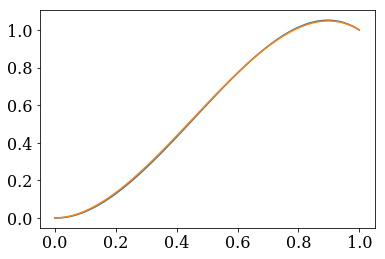

In [13]:
print(p[-1],p[-2])
pyplot.plot(x,p)
pyplot.plot(x,pexact)